In [1]:
import numpy as np #for numerical operations and handling arrays
import matplotlib.pyplot as plt #for plotting graphs and images
import seaborn as sns #for more enhancing the statistical data 
from PIL import Image #for opening and manipulating the images

Convert RGB to grayscale (color image to black n white image)

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
    #"rgb[...,:3]" This part selects the red, green, and blue channels from the image. In other words, it extracts the color information from the image.
    #Whole statement calculates the grayscale value. It does this by multiplying each color channel by a specific weight and then adding them together.

Local Binary Pattern Function

In [3]:
def lbp(image):
    height, width = image.shape #Gets the dimensions of the input image.
    lbp_image = np.zeros((height, width), dtype=np.uint8)  #Initializes an array to store the LBP image.
    lbp_values = np.zeros((height - 2, width - 2), dtype=np.uint8) #Initializes an array to store the LBP values (excluding the border pixels).
    offsets = [(-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1)] #Defines the relative positions of the 8 neighbors.
    """(-1,1)  (0,1)   (1,1)
       (-1,0)  (0,0)   (1,0)
       (-1,-1) (0,-1)  (1,-1)"""
    for y in range(1, height - 1):  #These two Loops go through each pixel excluding the borders.
        for x in range(1, width - 1):
            center = image[y, x] #Gets the value of the center pixel.
            binary_string = '' #Initialises the binary string to empty
            for dy, dx in offsets:
                neighbor = image[y + dy, x + dx] #Compute the neighbor values and store it in neighbor variable
                binary_string += '1' if neighbor >= center else '0'
            lbp_value = int(binary_string, 2)  #Converts the binary string to an integer.
            lbp_image[y, x] = lbp_value  #Stores the LBP value in the LBP image.
            lbp_values[y - 1, x - 1] = lbp_value #Stores the LBP value in the values array.
    
    return lbp_image, lbp_values

In [7]:
# Load a sample image
image_path = r'C:\Users\aryan\Desktop\ML\imageCOL2.jpg'  # Replace this with the path to your image file
img = Image.open(image_path)
img = np.asarray(img)

# Convert to grayscale
gray_image = rgb2gray(img)

# Apply LBP to the grayscale image
lbp_image, lbp_values = lbp(gray_image)

# Display LBP values as a simple array
print("LBP Values:")
print(lbp_values)

LBP Values:
[[195 199 223 ... 143 191  62]
 [195 199 159 ... 143 191  62]
 [241 201 255 ... 143 191  62]
 ...
 [ 17  17  17 ... 241 240 240]
 [255 255 255 ... 241 240 240]
 [255 255 255 ... 249 240 240]]


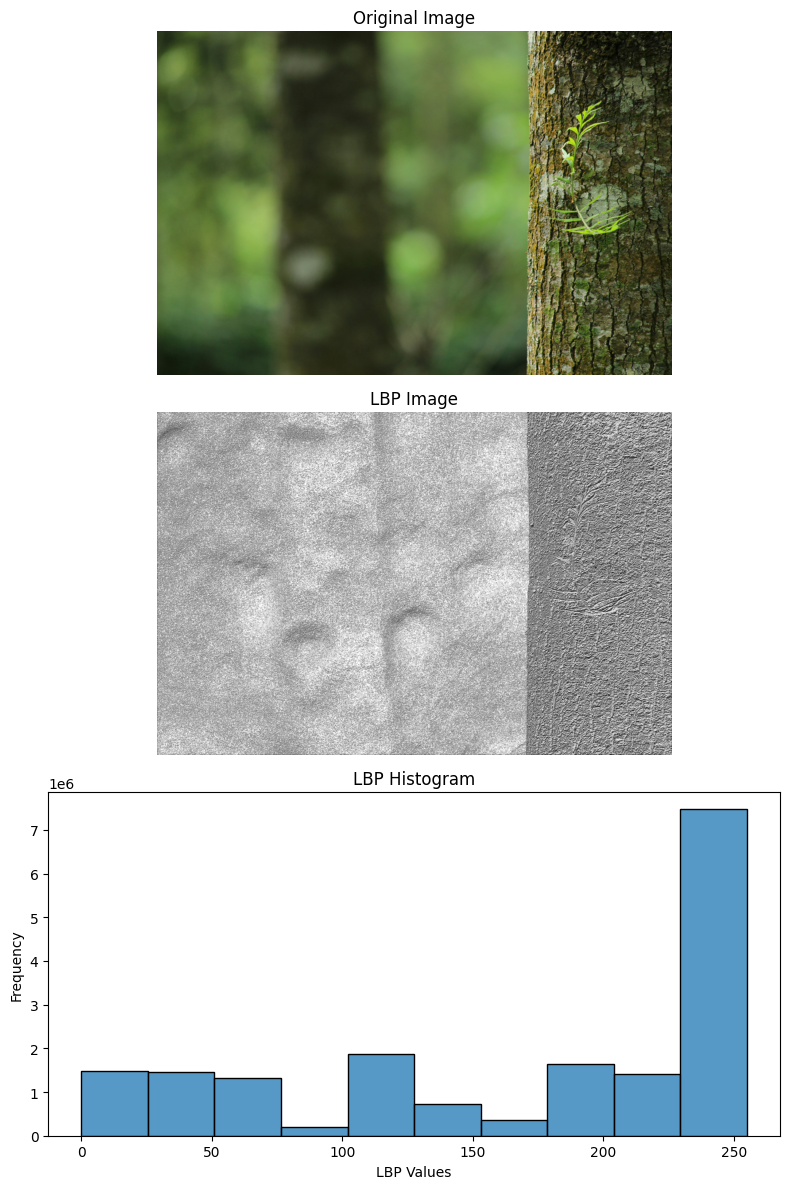

In [8]:
# Scale the LBP image for better visibility
lbp_image_scaled = lbp_image.astype(np.float32) / np.max(lbp_image)  # Scale to [0, 1]

# Display original image, LBP image, and LBP histogram vertically
plt.figure(figsize=(8, 12))  # Adjust figure size as needed

# Original Image
plt.subplot(3, 1, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

# LBP Image
plt.subplot(3, 1, 2)
plt.title('LBP Image')
plt.imshow(lbp_image_scaled, cmap='gray')
plt.axis('off')

# LBP Histogram
plt.subplot(3, 1, 3)
plt.title('LBP Histogram')
sns.histplot(lbp_image.reshape(-1), bins=10, kde=False)
plt.xlabel('LBP Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
